# 3D viewing
This notebook will show how to display 3D results with resipy in a notebook. Note that 3D viewing is based on the Python package: *pyvista* that needs to be installed (`pip install pyvista`).

In [1]:
import sys
sys.path.append('../src')
from resipy import Project
import pyvista as pv
testdir = '../src/examples/'

API path =  /media/jkl/data/phd/tmp/resipy/src/resipy
ResIPy version =  3.2.0
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


Create a Survey and Mesh, then display the mesh using a pyvista plotter object (which displays inline with the notebook). 

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
0/644 reciprocal measurements found.
Creating tetrahedral mesh...fmd in gmshWrap.py: 16.343534
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/resipy/src/resipy/invdir

Reading mesh3d.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 7581 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
interpolating topography onto mesh using triangulate interpolation...done
Done
ResIPy Estimated RAM usage = 0.164347 Gb
done


Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


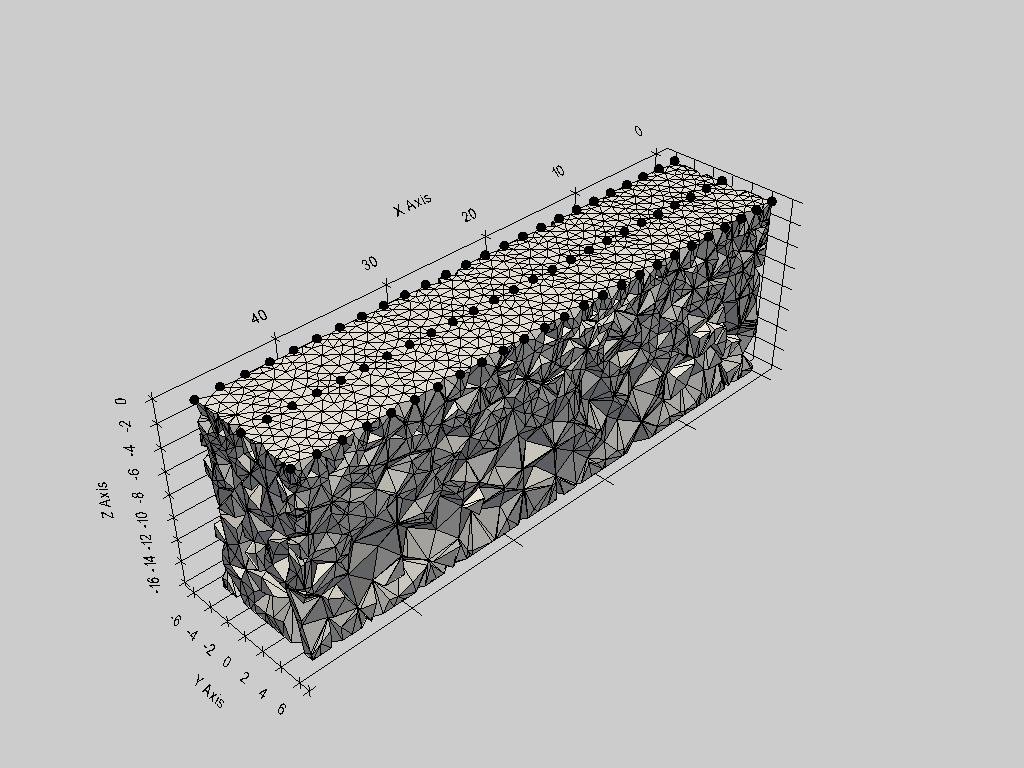

In [2]:
k = Project(typ='R3t')
k.createSurvey(testdir + 'dc-3d/protocol.dat', ftype='ProtocolDC')
k.importElec(testdir + 'dc-3d/elec.csv')
k.createMesh()
pl = pv.Plotter() # init pyvista plotter object 
k.showMesh(ax=pl)

Now invert the data 

In [3]:
k.invert()

Writing .in file and protocol.dat... done!
--------------------- MAIN INVERSION ------------------


 >> R 3 t     E R T    M o d e l    v2.01 <<

 >> Date: 05-11-2020
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> T e t r a h e d r a l   E l e m e n t   M e s h <<

 >> Reading mesh file 
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading resistivity model from res0.dat                                                                        

 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<

 >> Memory estimates:
    For   1000 measurements the memory needed is:          0.250 Gb
    For   2000 measurements the memory needed is:          0.491 Gb
    For   5000 measurements the memory needed is:          1.213 Gb
    For  10000 measurements the memory ne

## Options available
- `pvslices`: a tuple of list, each list represent the coordinates of an slice orthogonal to X, Y and Z respectively
- `pvthreshold` : a list of two values representing the minimum and maximum values between which to keep the cells
- `pvcontour` : a list of values at which draw isosurfaces
- `pvgrid`: a bool, if `True`, the grid is plotted

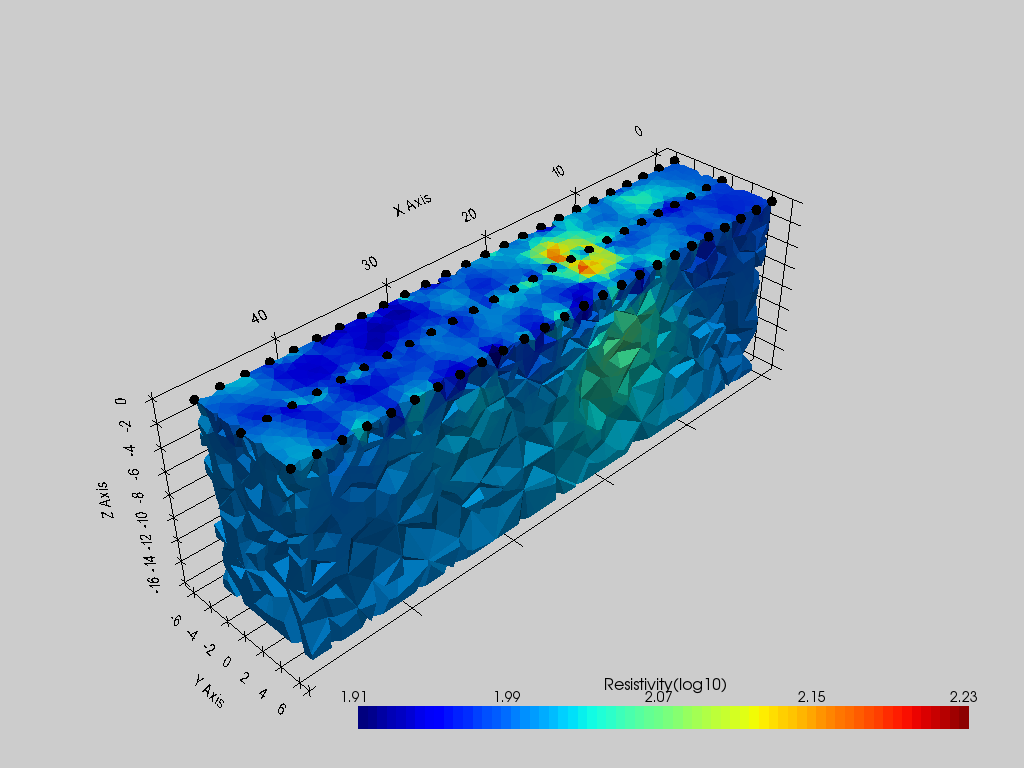

In [4]:
pl = pv.Plotter()
k.showResults(ax=pl, color_map='jet')

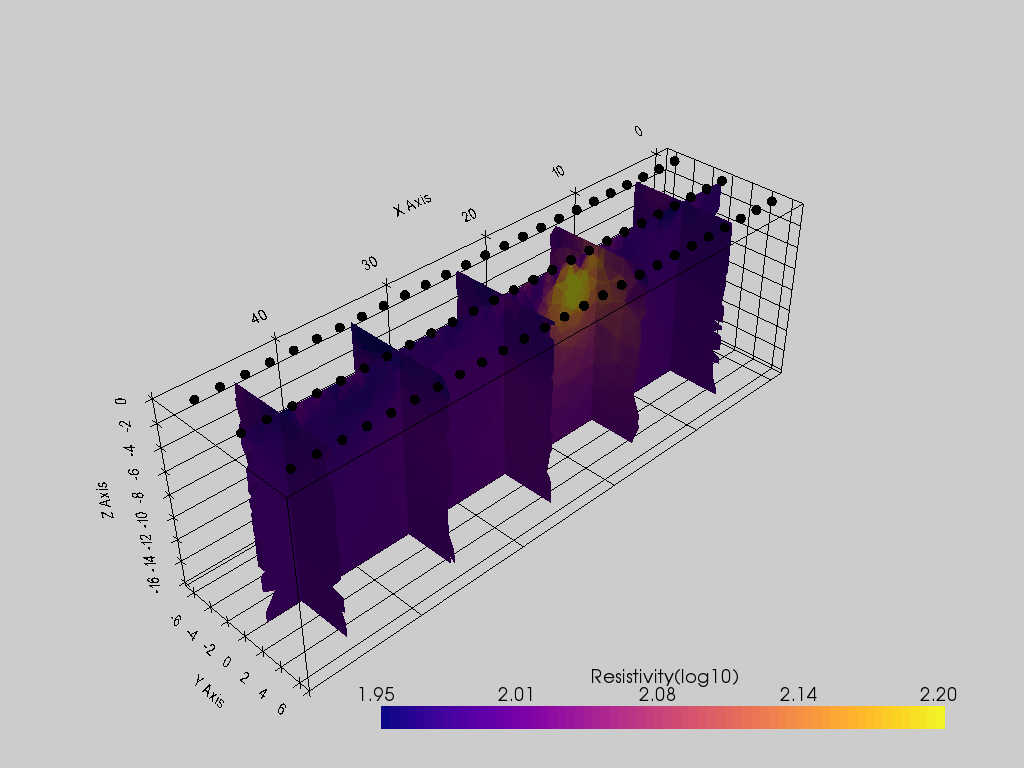

In [5]:
pl = pv.Plotter()
k.showResults(ax=pl, pvslices=([5,15,25,35,45],[0],[]), pvgrid=True, vmin=1.95, vmax=2.2, color_map='plasma')

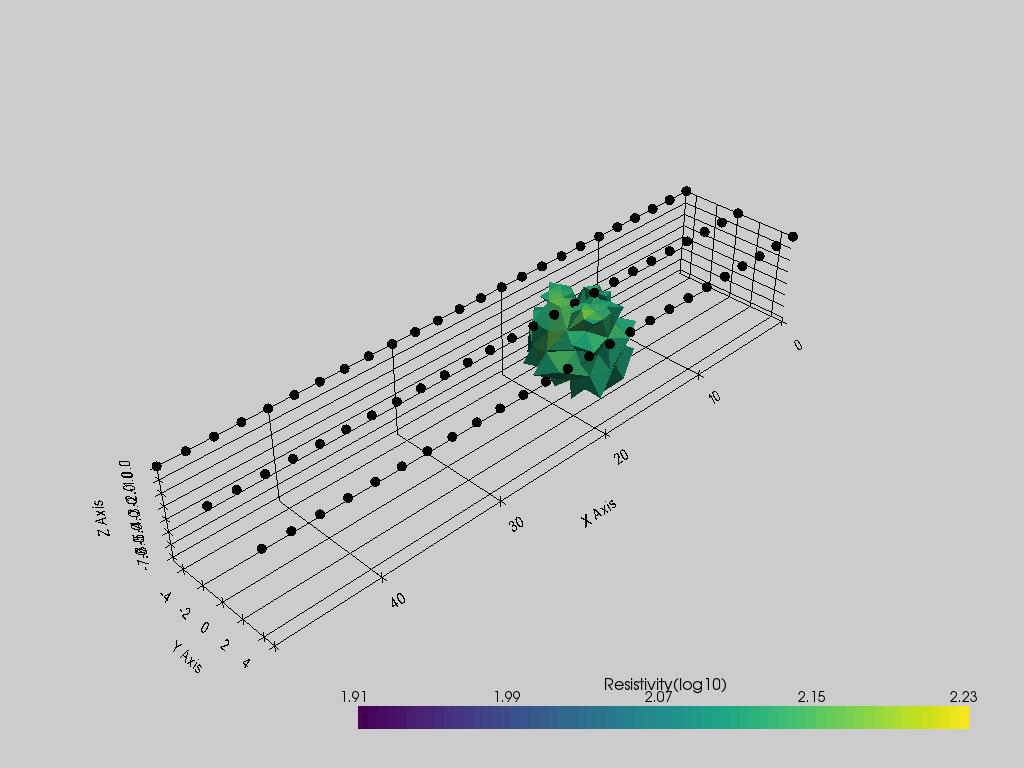

In [6]:
pl = pv.Plotter()
k.showResults(ax=pl, pvthreshold=[2.1, 2.2], pvgrid=True)

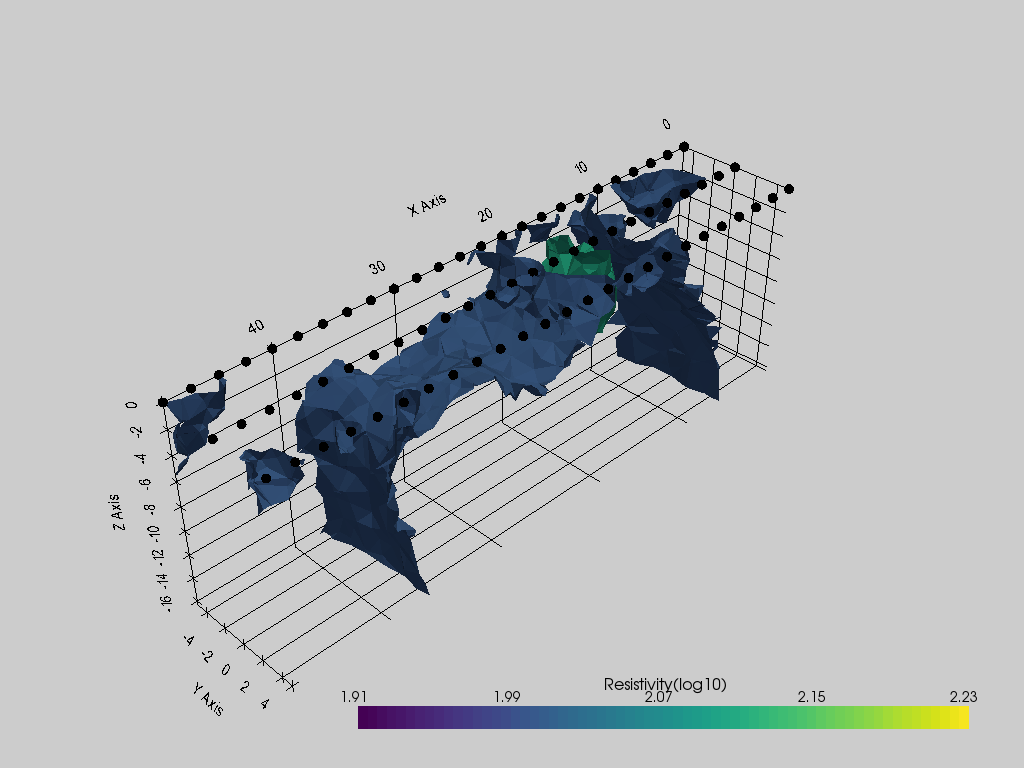

In [7]:
pl = pv.Plotter()
k.showResults(ax=pl, pvcontour=[2, 2.1], pvgrid=True)